In [29]:
# Mount our Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

In [30]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset source : [link](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies)

In [31]:
df = pd.read_csv("../../data/movie-data-csv/amazon-prime.csv")
df.head(2).T

,0,1
id,ts20945,tm19248
title,The Three Stooges,The General
type,SHOW,MOVIE
plot,The Three Stooges were an American vaudeville ...,"During America’s Civil War, Union spies steal ..."
release_year,1934,1926
age_certification,TV-PG,NaN
runtime,19,78
genres,"['comedy', 'family', 'animation', 'action', 'f...","['action', 'drama', 'war', 'western', 'comedy'..."
production_countries,['US'],['US']
seasons,26.0,NaN


### Data Understanding

In [32]:
df.shape

(9871, 15)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   plot                  9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [34]:
missing_info = df.isnull().sum().to_frame(name='Null Count')
missing_info['Null Percentage (%)'] = (df.isnull().mean() * 100).round(2)
missing_info = missing_info.sort_values(by='Null Count', ascending=False)
missing_info

,Null Count,Null Percentage (%)
seasons,8514,86.25
age_certification,6487,65.72
tmdb_score,2082,21.09
imdb_votes,1031,10.44
imdb_score,1021,10.34
imdb_id,667,6.76
tmdb_popularity,547,5.54
plot,119,1.21
runtime,0,0.00
title,0,0.00


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,9871.0,2001.327221,25.810071,1912.000000,1995.500,2014.000,2018.000,2022.000
runtime,9871.0,85.973052,33.512466,1.000000,65.000,89.000,102.000,549.000
seasons,1357.0,2.791452,4.148958,1.000000,1.000,1.000,3.000,51.000
imdb_score,8850.0,5.976395,1.343842,1.100000,5.100,6.100,6.900,9.900
imdb_votes,8840.0,8533.614253,45920.151905,5.000000,117.000,462.500,2236.250,1133692.000
tmdb_popularity,9324.0,6.910204,30.004098,0.000011,1.232,2.536,5.634,1437.906
tmdb_score,7789.0,5.984247,1.517986,0.800000,5.100,6.000,6.900,10.000


In [36]:
import ast

# Parsing string representations of lists (like "[comedy, drama]") into actual Python list objects (['comedy', 'drama'])
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Check the maximum and minimum length of plot description

In [37]:
# Calculate the length of each description
description_lengths = df['plot'].str.len()

max_length = description_lengths.max()
min_length = description_lengths.min()

print(f"Maximum plot description length: {max_length}")
print(f"Minimum plot description length: {min_length}")

Maximum plot description length: 2151.0
Minimum plot description length: 11.0


Check the maximum and minimum number of genres a particular movie has

In [38]:
# Calculate the number of genres for each movie
genre_counts = df['genres'].apply(len)

# Find the max and min number of genres
max_genres = genre_counts.max()
min_genres = genre_counts.min()

print(f"Maximum number of genres for a movie: {max_genres}")
print(f"Minimum number of genres for a movie: {min_genres}")

Maximum number of genres for a movie: 8
Minimum number of genres for a movie: 0


Maximum and minimum movie released year

In [39]:
latest_movie_year = df['release_year'].max()
oldest_movie_year = df['release_year'].min()

print(f"Latest oldest year of a movie : {latest_movie_year}")
print(f"Oldest realease year a movie: {oldest_movie_year}")

Latest oldest year of a movie : 2022
Oldest realease year a movie: 1912


### Exploratory Data Analysis

Type count

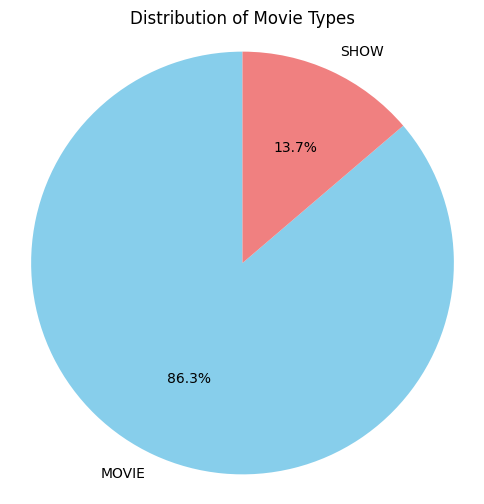

In [40]:
# Get value counts
type_counts = df['type'].value_counts()
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Movie Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

Check distribution of each individual genres

In [41]:
from collections import Counter

all_genres = df['genres'].dropna().sum()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_df['Percentage (%)'] = (genre_df['Count'] / genre_df['Count'].sum()) * 100
genre_df

,Genre,Count,Percentage (%)
0,drama,4764,21.590755
1,comedy,2987,13.537276
2,thriller,2119,9.603444
3,action,1820,8.248357
4,romance,1752,7.940177
5,crime,1251,5.669613
6,documentation,1096,4.967143
7,horror,1065,4.826649
8,family,751,3.403580
9,european,712,3.226830


Genre distribution plot by Count


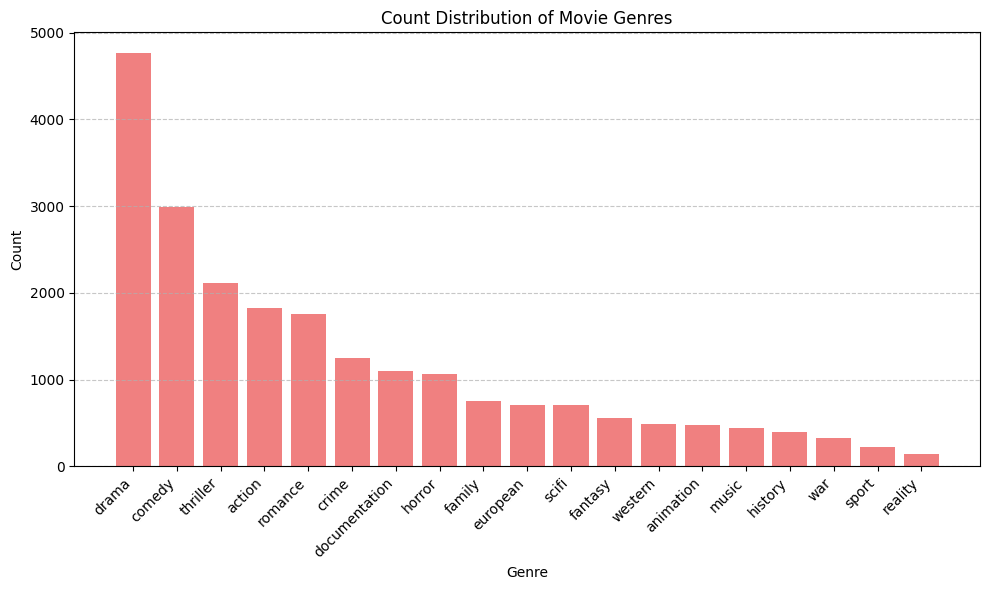

In [42]:
# Plotting the distribution by percentage
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
print("Genre distribution plot by Count")

Most Common Genre Combinations

In [43]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
genre_set_counts.head(20)

genres
[drama]                             908
[comedy]                            686
[documentation]                     493
[drama, comedy]                     304
[romance, drama]                    284
[romance, drama, comedy]            252
[horror]                            217
[]                                  209
[thriller, crime, drama]            201
[romance, comedy]                   198
[thriller, drama]                   190
[thriller]                          189
[horror, thriller]                  178
[crime, drama]                      145
[western]                           114
[action, drama]                     106
[action]                             99
[thriller, crime, drama, action]     78
[documentation, comedy]              77
[family, drama]                      73
Name: count, dtype: int64

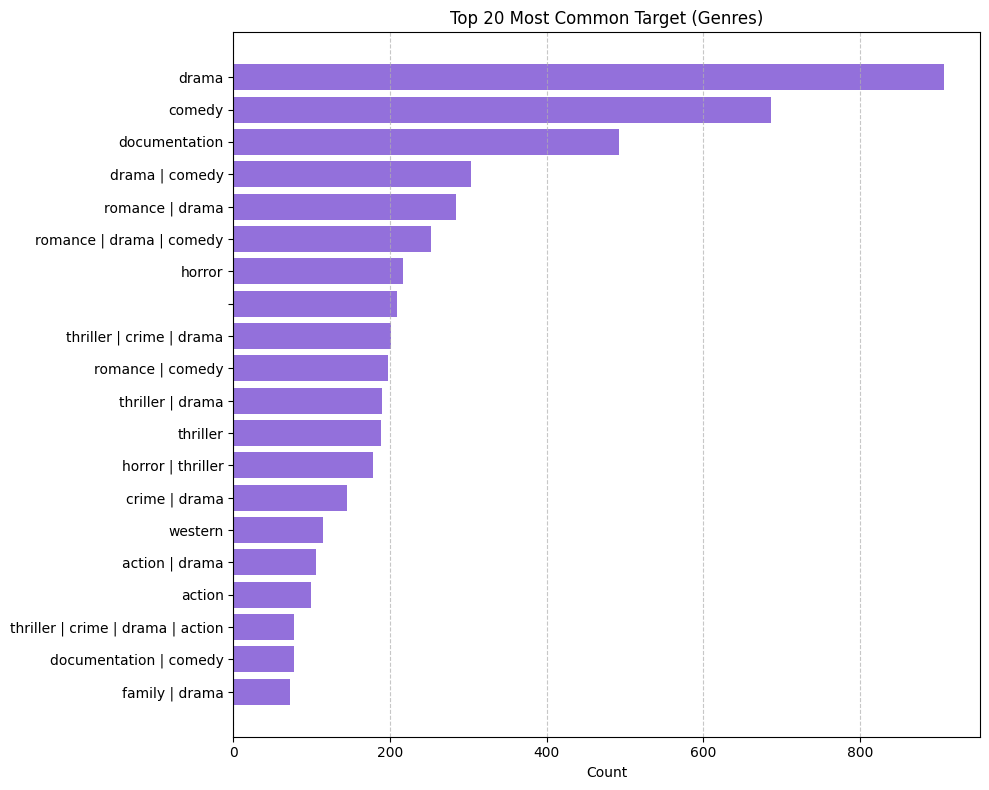

In [44]:
top_20_genres = genre_set_counts.head(20)
labels = [' | '.join(g) for g in top_20_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_20_genres.values, color='mediumpurple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Target (Genres)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Genre Combinations (With more than one genre)

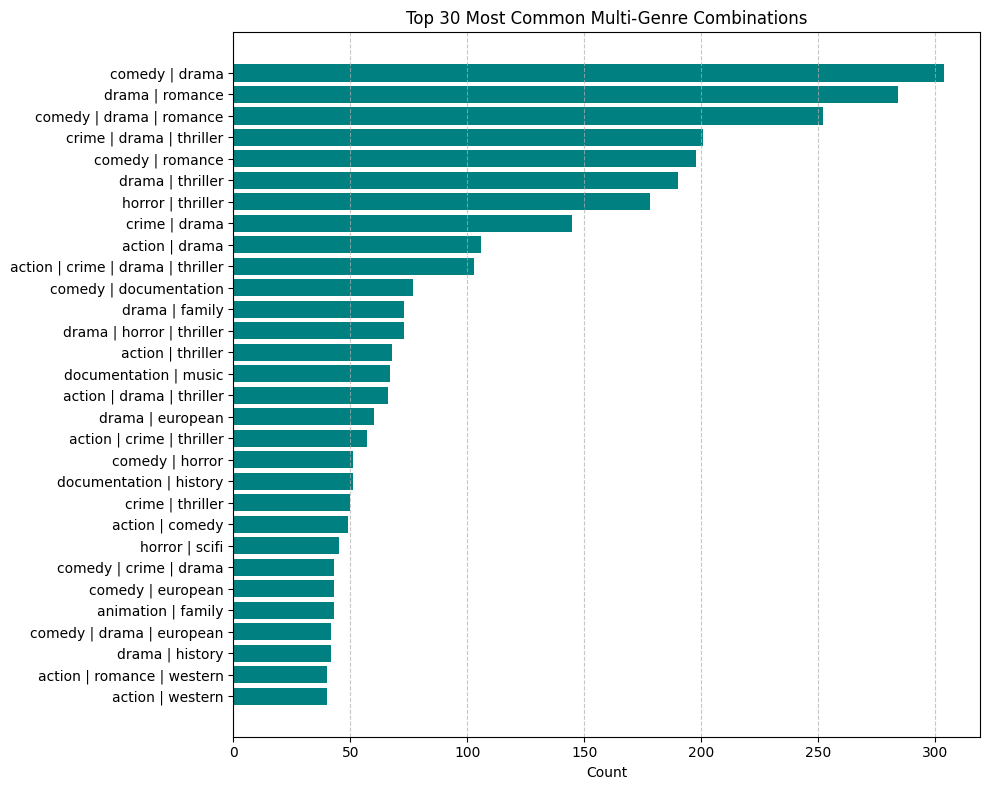

In [45]:
genre_sets = df['genres'].apply(lambda x: frozenset(x))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) > 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(30)
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Top 30 Most Common Multi-Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Single Genre (With more than one genre)

In [46]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) <= 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(20)
top_multi_genres

genres
[drama]            908
[comedy]           686
[documentation]    493
[horror]           217
[]                 209
[thriller]         189
[western]          114
[action]            99
[animation]         62
[reality]           59
[family]            54
[scifi]             48
[romance]           37
[music]             32
[crime]             27
[fantasy]           22
[sport]              5
[war]                2
[european]           2
[history]            2
Name: count, dtype: int64

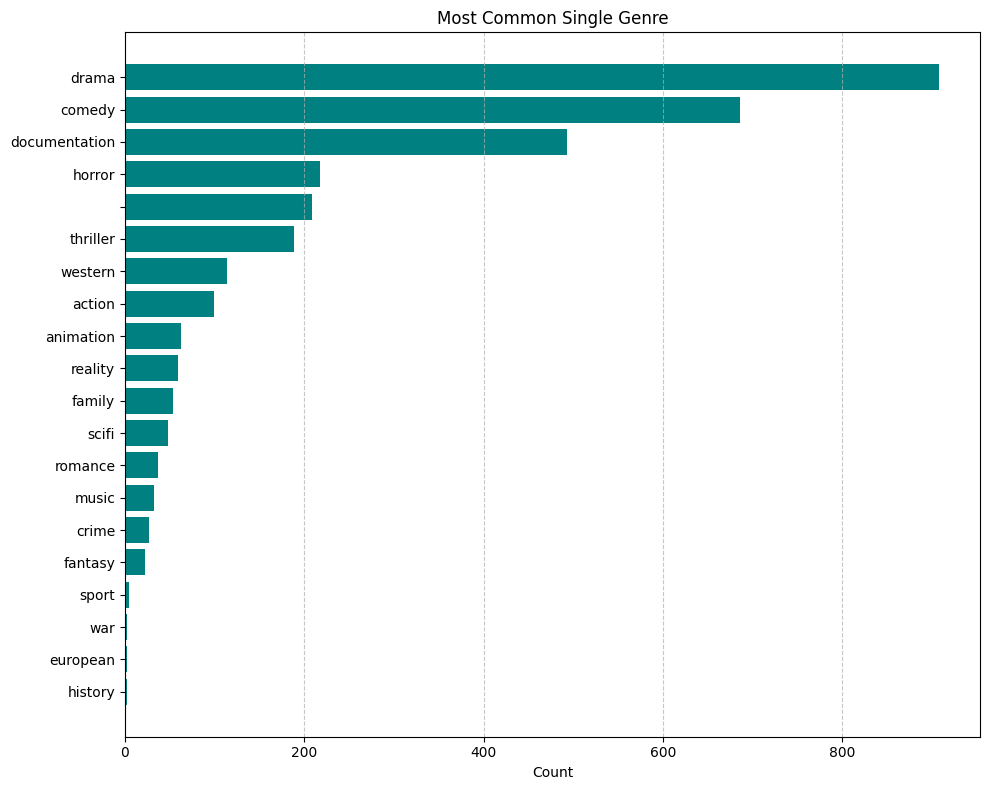

In [47]:
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Most Common Single Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What is the most popular single-labeled genre based on imdb score

In [48]:
# Explode genres to handle multi-genre entries
genre_expanded_df = df.copy()
genre_expanded_df = genre_expanded_df.explode('genres')

# Group by individual genre and compute average IMDb score and count
genre_stats = genre_expanded_df.groupby('genres')['imdb_score'].agg(['mean', 'count'])

# Round the average IMDb score
genre_stats['mean'] = genre_stats['mean'].round(1)
genre_stats = genre_stats.reset_index()
genre_stats.columns = ['genre', 'imdb_score', 'count']
genre_stats = genre_stats.sort_values(by='imdb_score', ascending=False).reset_index(drop=True)
genre_stats

,genre,imdb_score,count
0,documentation,7.0,949
1,history,6.8,379
2,reality,6.7,129
3,animation,6.5,434
4,sport,6.4,224
5,war,6.4,316
6,european,6.3,698
7,music,6.2,395
8,drama,6.1,4489
9,family,6.1,724


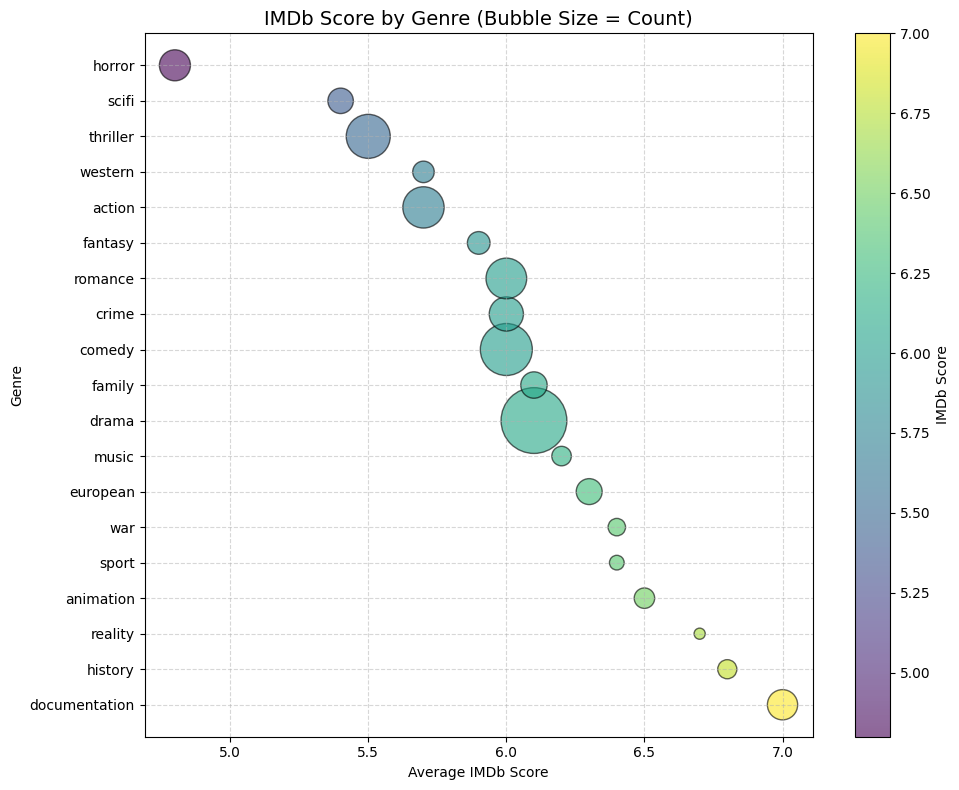

In [49]:
plt.figure(figsize=(10, 8))
plt.scatter(
    genre_stats['imdb_score'], genre_stats['genre'],
    s=genre_stats['count'] / 2,  # bubble size
    alpha=0.6, c=genre_stats['imdb_score'], cmap='viridis', edgecolor='black'
)

plt.title('IMDb Score by Genre (Bubble Size = Count)', fontsize=14)
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.colorbar(label='IMDb Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

What is the most popular multi-labeled genre based on imdb score ?

In [50]:
multi_genre_df = df[df['genres'].apply(lambda x: len(x) > 1)].copy()
multi_genre_df['genre_combo'] = multi_genre_df['genres'].apply(lambda x: tuple(sorted(x)))
grouped = multi_genre_df.groupby('genre_combo')['imdb_score'].agg(['mean', 'count'])
genre_combo_stats = grouped.reset_index()
genre_combo_stats['mean'] = genre_combo_stats['mean'].round(1)
genre_combo_stats.columns = ['genre_combination', 'imdb_score', 'count']
genre_combo_stats = genre_combo_stats.sort_values(by='count', ascending=False).reset_index(drop=True)
genre_combo_stats.head(20)

,genre_combination,imdb_score,count
0,"(comedy, drama)",6.2,286
1,"(drama, romance)",6.3,276
2,"(comedy, drama, romance)",6.1,247
3,"(crime, drama, thriller)",6.1,199
4,"(comedy, romance)",5.7,195
5,"(drama, thriller)",5.7,177
6,"(horror, thriller)",4.7,165
7,"(crime, drama)",5.9,139
8,"(action, drama)",5.6,104
9,"(action, crime, drama, thriller)",6.0,101


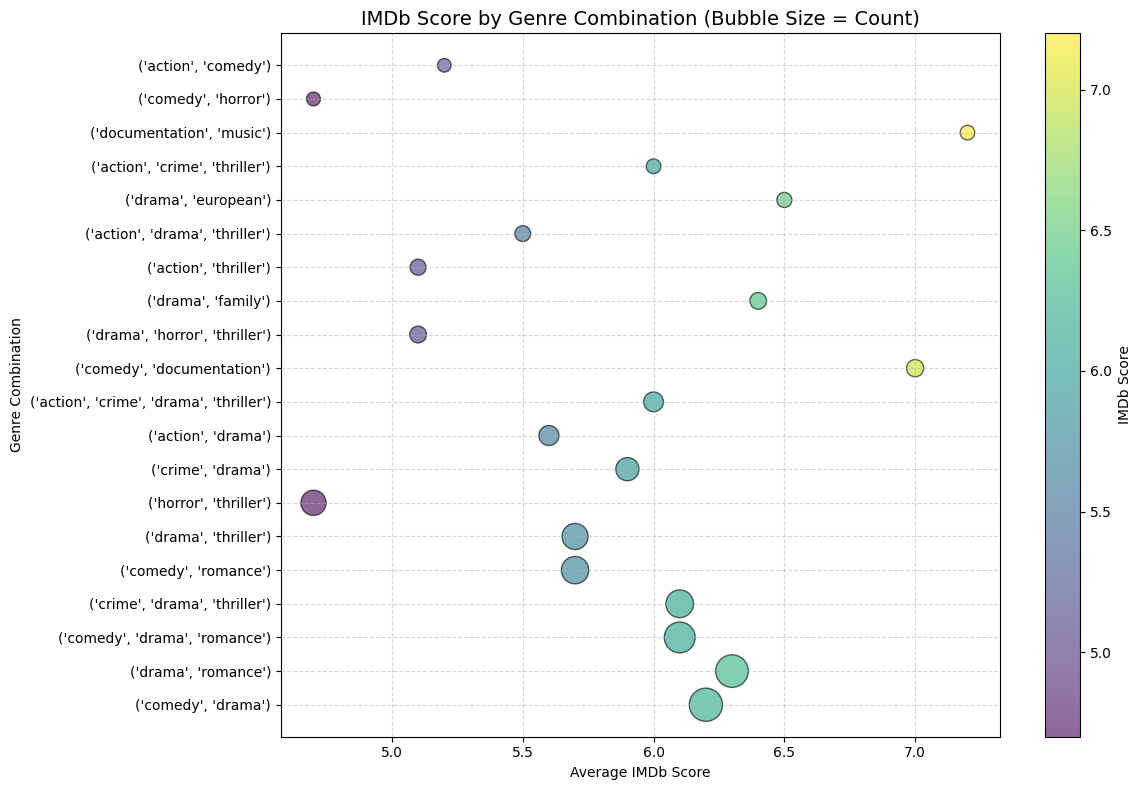

In [51]:
# Use top 15 combinations only for readability
top_combos = genre_combo_stats.head(20)

plt.figure(figsize=(12, 8))
plt.scatter(
    top_combos['imdb_score'],
    top_combos['genre_combination'].astype(str),  # Convert tuples to strings for labels
    s=top_combos['count'] * 2,  # Bubble size
    c=top_combos['imdb_score'],  # Color by IMDb score
    cmap='viridis',
    alpha=0.6,
    edgecolors='black'
)

plt.title('IMDb Score by Genre Combination (Bubble Size = Count)', fontsize=14)
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre Combination')
plt.colorbar(label='IMDb Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()